# Calculate the porphyrin dimensions

In [2]:
from math import cos, radians

def average(num_1, num_2 = None):
    if type(num_1) is list:
        return sum(num_1) / len(num_1)
    else:
        if num_2 is not None:
            numbers = [num_1, num_2]
            average = sum(numbers) / len(numbers)
            return average
        else:
            return num_1

# chemical dimensions in Angstroms (as the averages from https://en.wikipedia.org/wiki/Bond_length) and degrees
chemical_dimensions = {
    'bond':{
        'c-c':average(1.2,1.54),
        'c-h':average(1.06,1.12),
        'c-n':average(1.47,2.1),
        'c-f':average(1.34),
        'n=n':average(1.23) # https://doi.org/10.1016/B978-0-08-101033-4.00003-6
    },
    'angle':{
        'sp3':109.5,
        'sp2':120
    }
}

# abbreviate dimensions
cc_bond = chemical_dimensions['bond']['c-c']
cn_bond = chemical_dimensions['bond']['c-n']
mostly_forward_sp2 = cos(radians(chemical_dimensions['angle']['sp2']-90))
less_forward_sp2 = cos(radians(180-chemical_dimensions['angle']['sp2']))

# calculate the total molecular length & width
center_porphyrin_length = (cc_bond*(3*mostly_forward_sp2 + less_forward_sp2))
sp2_extension = (cc_bond * (2 + less_forward_sp2) + cn_bond * (1 + less_forward_sp2))
total_length = sp2_extension + center_porphyrin_length
print(total_length, 'Angstroms')

10.346864409554044 Angstroms


# Define and execute the solution simulation

The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 7.4E15 photosensitizers = (9.3E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 3.8E-6
photons per timestep:	2.632802071394705e-06
effective excitation watts:	4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*0.000821795989141709*0.6*ps - 666666666.666667*e_ps;
  _J1: e_ps + mo => so + ps; 0.8*10000000*e_ps*mo;
  _J2: ps + so => b_ps; 2.4*ps*so;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 2796.6904521946*so*fa;
  _J5:  => fa; 0.00038441*fa;

  // Species initializations:
  ps = 3.15304599626797e-07;
  e_ps = 4.66407329043956e-06;
  mo = 0.00028061170421285;
  so = 6.28220906184943e-07;
  b_ps = 2.0622109933651e-08;
  fa = 

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:83: DeprecationWarning:

invalid escape sequence \.

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89

,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.265523,0.936662,0.134022,1.198334
0.100418,0.452173,0.936645,0.261357,1.198223
0.150628,0.586889,0.936629,0.383933,1.198111
0.200837,0.685979,0.936613,0.503042,1.198000
0.251046,0.759886,0.936597,0.619582,1.197889
...,...,...,...,...
4.820084,1.000000,0.935122,10.104434,1.187905
4.870293,1.000000,0.935106,10.179888,1.187797
4.920502,1.000000,0.935090,10.300386,1.187688


The oxidation data was refined into inactivation data after 1 loops


,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa]
Time (s),,,,,,,
0.000000,5.000000e-06,0.000000,0.000281,0.000000e+00,0.000000e+00,1.097643e-02,0.000000
180.753138,3.166050e-07,0.000005,0.000281,6.299494e-07,8.650551e-11,8.557832e-03,0.003094
361.506276,3.165995e-07,0.000005,0.000281,6.301371e-07,1.730390e-10,6.671422e-03,0.005507
542.259414,3.165940e-07,0.000005,0.000281,6.302811e-07,2.595936e-10,5.200375e-03,0.007388
723.012552,3.165885e-07,0.000005,0.000281,6.303909e-07,3.461641e-10,4.053432e-03,0.008855
...,...,...,...,...,...,...,...
42476.987448,3.153264e-07,0.000005,0.000281,6.282649e-07,2.027837e-08,-7.524435e-14,0.014038
42657.740586,3.153209e-07,0.000005,0.000281,6.282539e-07,2.036431e-08,-7.488653e-14,0.014038
42838.493724,3.153155e-07,0.000005,0.000281,6.282429e-07,2.045025e-08,-7.380128e-14,0.014038


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.265523,0.936662,0.134022,1.198334,0.265523,4.134022
0.100418,0.452173,0.936645,0.261357,1.198223,0.452173,4.261357
0.150628,0.586889,0.936629,0.383933,1.198111,0.586889,4.383933
0.200837,0.685979,0.936613,0.503042,1.198000,0.685979,4.503042
0.251046,0.759886,0.936597,0.619582,1.197889,0.759886,4.619582
...,...,...,...,...,...,...
4.820084,1.000000,0.935122,10.104434,1.187905,1.000000,14.104434
4.870293,1.000000,0.935106,10.179888,1.187797,1.000000,14.179888
4.920502,1.000000,0.935090,10.300386,1.187688,1.000000,14.300386


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy

7.6 time (hr)
0.050209     4.134022
0.100418     4.261357
0.150628     4.383933
0.200837     4.503042
0.251046     4.619582
              ...    
4.820084    14.104434
4.870293    14.179888
4.920502    14.300386
4.970711    14.458729
5.020921    14.871661
Name: log10-inactivation, Length: 100, dtype: float64
hours to target: 1.6569037656903765
hours to target: 1.6569037656903765
--> ERROR: The prediction of 1.6569037656903765 is not within the 0.8+/-0.4 tolerance of the actual value.
A 94.94117647058825%-error





The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 1.5E16 photosensitizers = (1.9E-11 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 7.6E-6
photons per timestep:	2.632802071394705e-06
effective excitation watts:	4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa;

  // Assignment Rules:
  oxida

,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.460821,0.936646,0.268267,1.198223
0.100418,0.702485,0.936613,0.526492,1.198001
0.150628,0.833794,0.936581,0.779354,1.197779
0.200837,0.906518,0.936548,1.029271,1.197558
0.251046,0.947222,0.936516,1.277546,1.197336
0.301255,0.970139,0.936484,1.524894,1.197115
0.351464,0.983084,0.936451,1.771715,1.196894
0.401674,0.990411,0.936419,2.018234,1.196672
0.451883,0.994562,0.936387,2.264577,1.196451


The oxidation data was refined into inactivation data after 1 loops


,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa]
Time (s),,,,,,,
0.000000,1.000000e-05,0.000000,0.000281,0.000000,0.000000e+00,1.097643e-02,0.000000
180.753138,6.331990e-07,0.000009,0.000280,0.000001,3.453197e-10,6.232289e-03,0.005327
361.506276,6.331771e-07,0.000009,0.000280,0.000001,6.908241e-10,3.537294e-03,0.008352
542.259414,6.331552e-07,0.000009,0.000280,0.000001,1.036423e-09,2.007289e-03,0.010070
723.012552,6.331333e-07,0.000009,0.000280,0.000001,1.382065e-09,1.138949e-03,0.011045
...,...,...,...,...,...,...,...
42476.987448,6.281171e-07,0.000009,0.000280,0.000001,8.060062e-08,-9.376522e-16,0.012323
42657.740586,6.280955e-07,0.000009,0.000280,0.000001,8.094080e-08,-1.234942e-15,0.012323
42838.493724,6.280740e-07,0.000009,0.000280,0.000001,8.128095e-08,-1.527014e-15,0.012323


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.460821,0.936646,0.268267,1.198223,0.460821,4.268267
0.100418,0.702485,0.936613,0.526492,1.198001,0.702485,4.526492
0.150628,0.833794,0.936581,0.779354,1.197779,0.833794,4.779354
0.200837,0.906518,0.936548,1.029271,1.197558,0.906518,5.029271
0.251046,0.947222,0.936516,1.277546,1.197336,0.947222,5.277546
0.301255,0.970139,0.936484,1.524894,1.197115,0.970139,5.524894
0.351464,0.983084,0.936451,1.771715,1.196894,0.983084,5.771715
0.401674,0.990411,0.936419,2.018234,1.196672,0.990411,6.018234
0.451883,0.994562,0.936387,2.264577,1.196451,0.994562,6.264577


7.6 time (hr)
0.050209     4.268267
0.100418     4.526492
0.150628     4.779354
0.200837     5.029271
0.251046     5.277546
0.301255     5.524894
0.351464     5.771715
0.401674     6.018234
0.451883     6.264577
0.502092     6.510817
0.552301     6.756994
0.602510     7.003131
0.652720     7.249242
0.702929     7.495332
0.753138     7.741407
0.803347     7.987469
0.853556     8.233520
0.903766     8.479560
0.953975     8.725589
1.004184     8.971617
1.054393     9.217613
1.104603     9.463544
1.154812     9.709492
1.205021     9.955423
1.255230    10.201366
1.305439    10.447040
1.355649    10.692148
1.405858    10.937470
1.456067    11.183142
1.506276    11.428185
1.556485    11.673623
1.606695    11.919330
1.656904    12.150627
1.707113    12.369495
1.757322    12.601337
1.807531    12.866763
1.857741    13.130847
1.907950    13.335308
1.958159    13.522349
2.008368    13.790787
Name: log10-inactivation, dtype: float64
hours to target: 0.7531380753138075
hours to target: 0.7531380753

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy

,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.709445,0.936613,0.536771,1.198003
0.100418,0.913252,0.936549,1.061741,1.197562
0.150628,0.973892,0.936485,1.583227,1.197121
0.200837,0.992123,0.936420,2.103646,1.196680
0.251046,0.997622,0.936356,2.623716,1.196240
0.301255,0.999282,0.936291,3.143652,1.195801
0.351464,0.999783,0.936227,3.663520,1.195362
0.401674,0.999934,0.936162,4.183339,1.194923
0.451883,0.999980,0.936098,4.703116,1.194485


The oxidation data was refined into inactivation data after 1 loops


,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa]
Time (s),,,,,,,
0.000000,0.000020,0.000000,0.000281,0.000000,0.000000e+00,1.097643e-02,0.000000
180.753138,0.000001,0.000019,0.000279,0.000003,1.375535e-09,3.318516e-03,0.008103
361.506276,0.000001,0.000019,0.000279,0.000003,2.751898e-09,1.002436e-03,0.010553
542.259414,0.000001,0.000019,0.000279,0.000003,4.128373e-09,3.027568e-04,0.011294
723.012552,0.000001,0.000019,0.000279,0.000003,5.504747e-09,9.143950e-05,0.011517
...,...,...,...,...,...,...,...
42476.987448,0.000001,0.000018,0.000278,0.000002,3.183070e-07,2.231120e-14,0.011614
42657.740586,0.000001,0.000018,0.000278,0.000002,3.196392e-07,2.544625e-14,0.011614
42838.493724,0.000001,0.000018,0.000278,0.000002,3.209712e-07,2.860896e-14,0.011614


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.709445,0.936613,0.536771,1.198003,0.709445,4.536771
0.100418,0.913252,0.936549,1.061741,1.197562,0.913252,5.061741
0.150628,0.973892,0.936485,1.583227,1.197121,0.973892,5.583227
0.200837,0.992123,0.936420,2.103646,1.196680,0.992123,6.103646
0.251046,0.997622,0.936356,2.623716,1.196240,0.997622,6.623716
0.301255,0.999282,0.936291,3.143652,1.195801,0.999282,7.143652
0.351464,0.999783,0.936227,3.663520,1.195362,0.999783,7.663520
0.401674,0.999934,0.936162,4.183339,1.194923,0.999934,8.183339
0.451883,0.999980,0.936098,4.703116,1.194485,0.999980,8.703116


7.6 time (hr)
0.050209     4.536771
0.100418     5.061741
0.150628     5.583227
0.200837     6.103646
0.251046     6.623716
0.301255     7.143652
0.351464     7.663520
0.401674     8.183339
0.451883     8.703116
0.502092     9.222845
0.552301     9.742506
0.602510    10.262131
0.652720    10.781346
0.702929    11.300564
0.753138    11.819409
0.803347    12.330047
0.853556    12.845760
0.903766    13.160380
0.953975    13.444275
1.004184    14.608697
Name: log10-inactivation, dtype: float64
hours to target: 0.3514644351464435
hours to target: 0.3514644351464435
The prediction of 0.3514644351464435 is within the 0.50+/-0.25 tolerance of the actual value.
A -29.799999999999997%-error







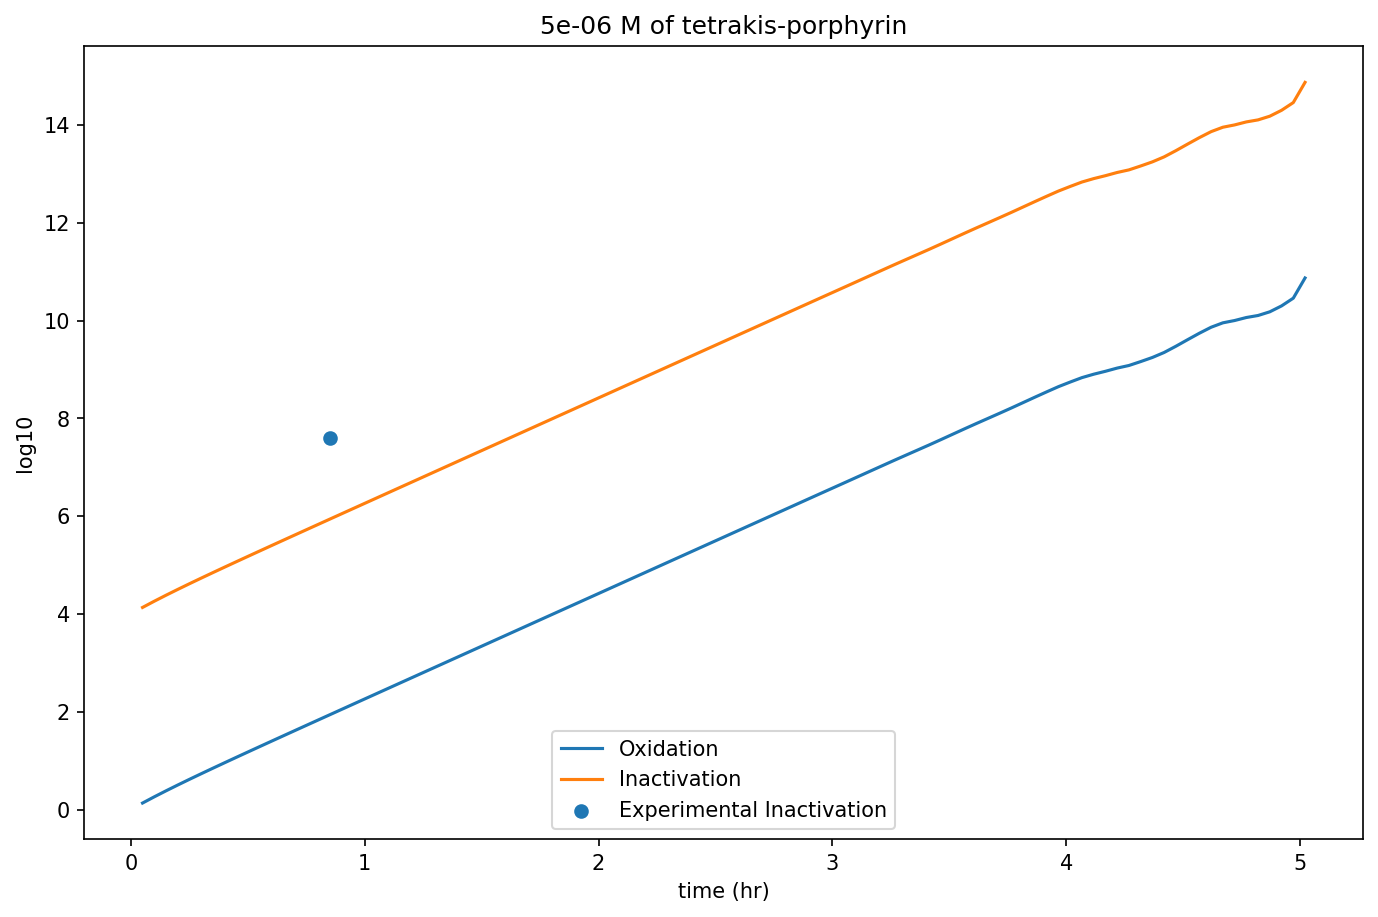

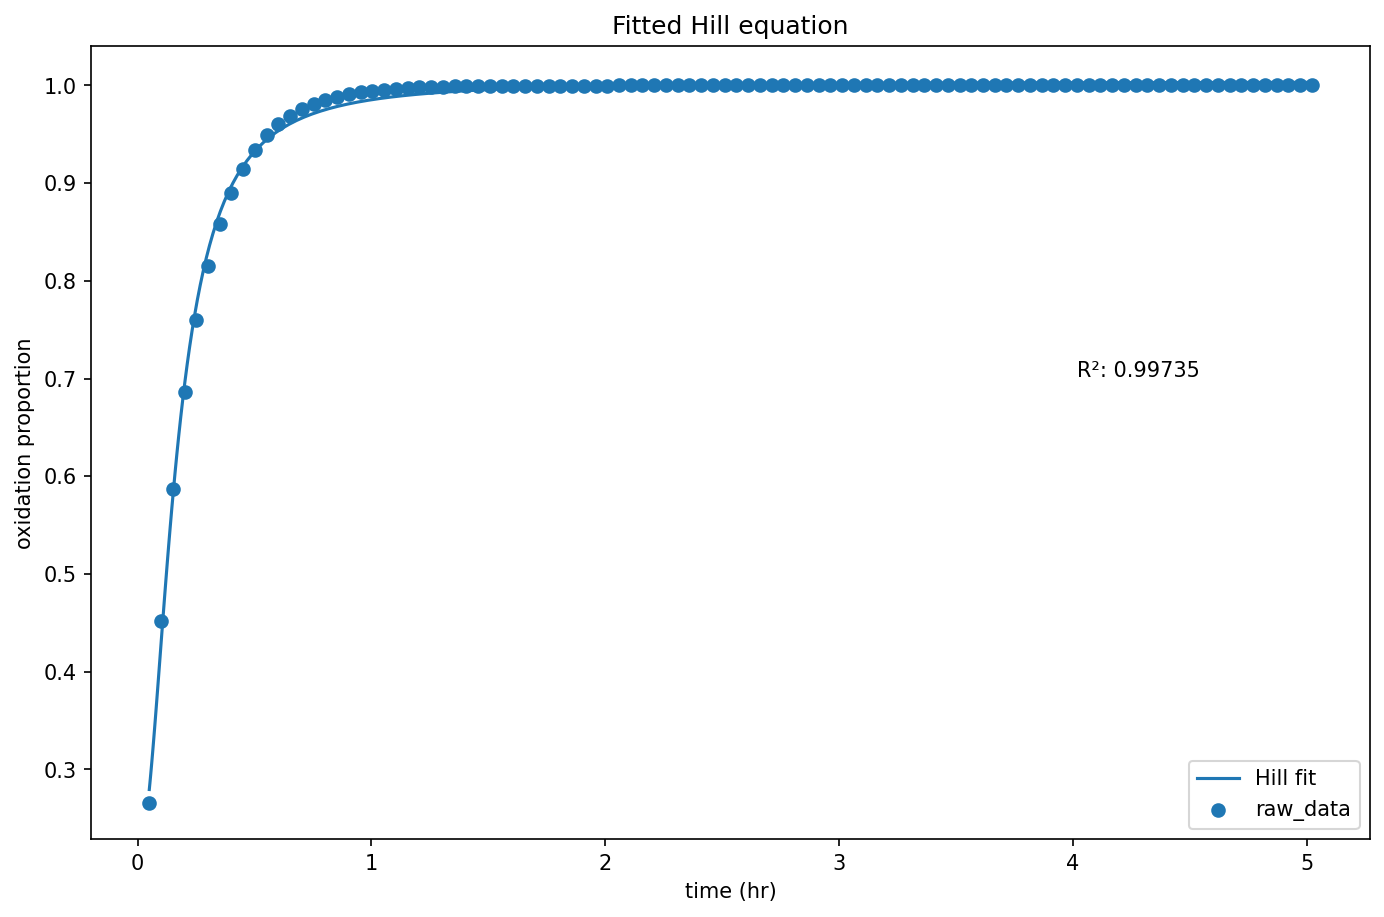

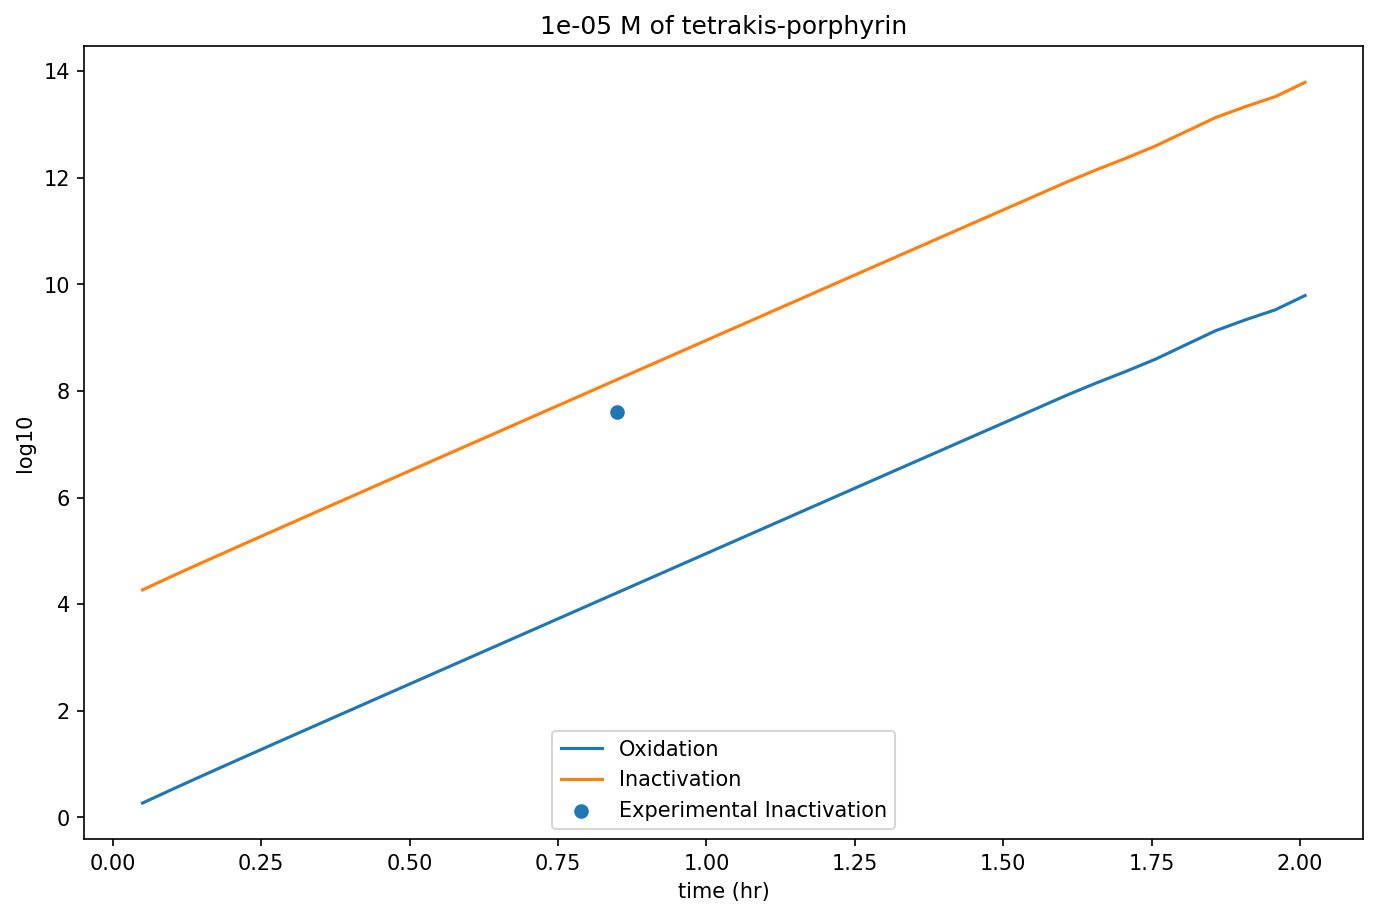

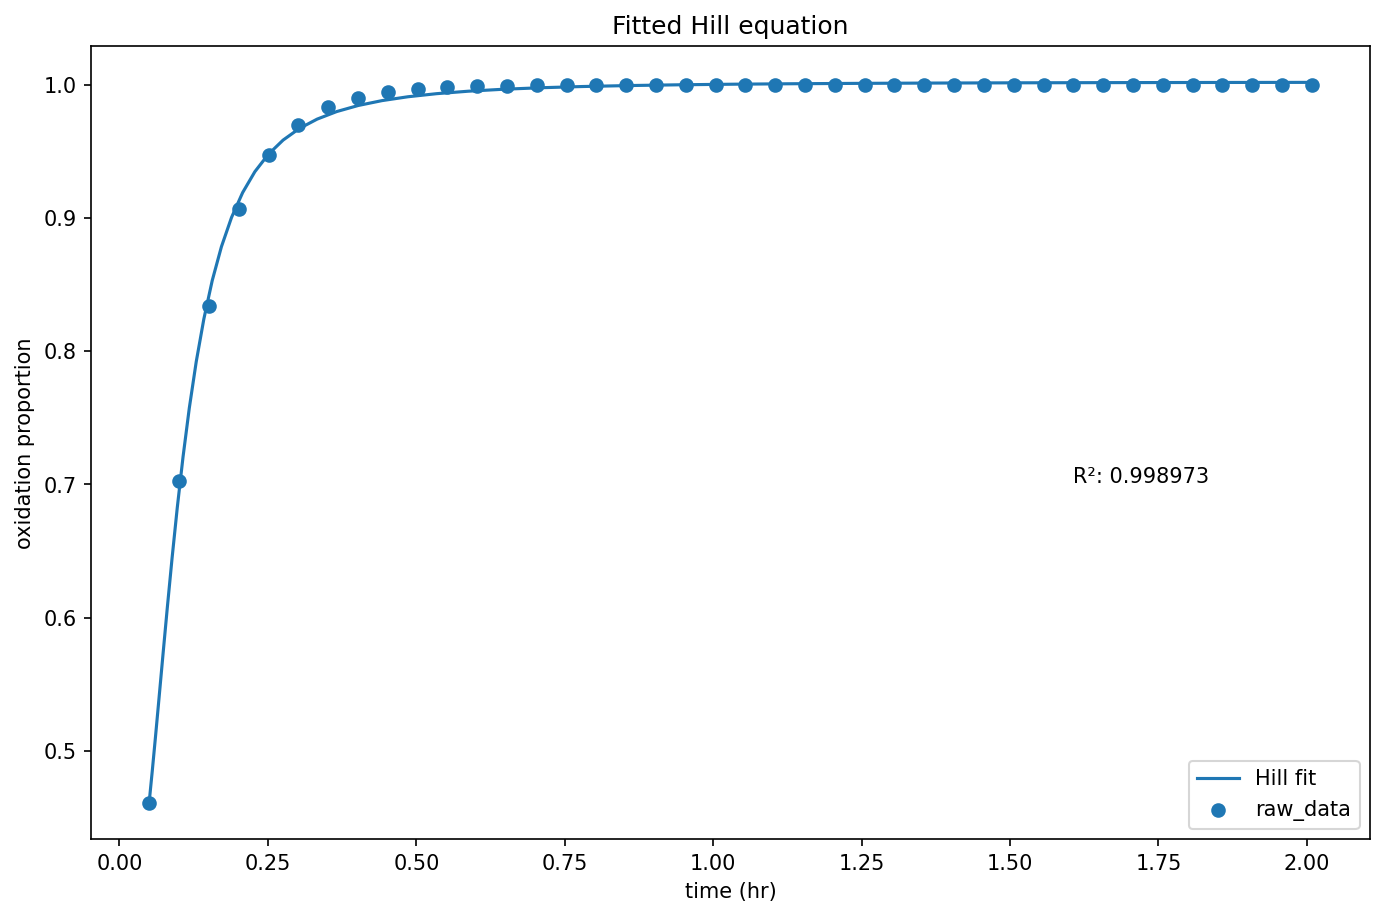

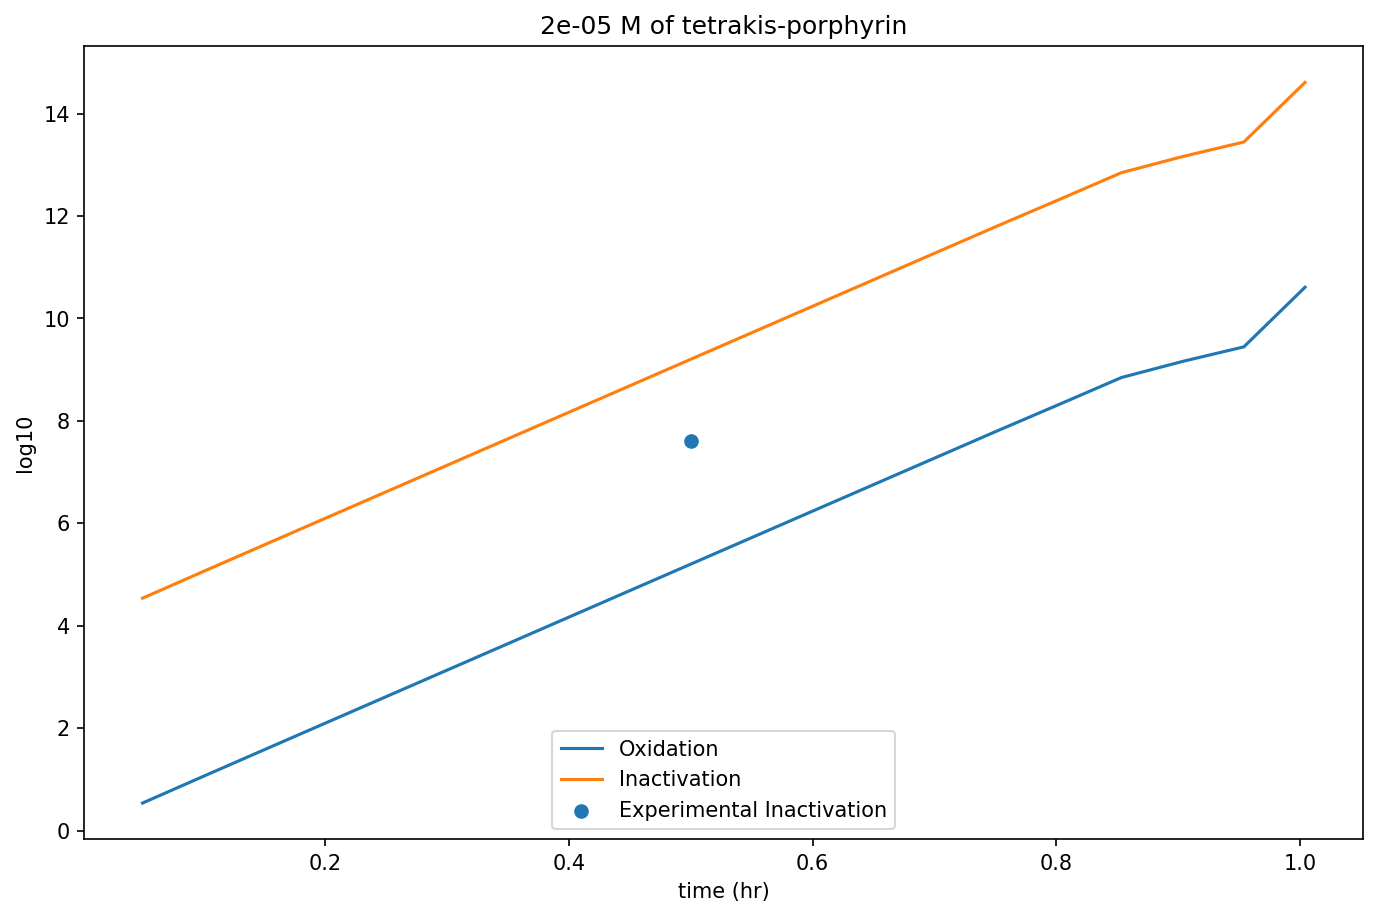

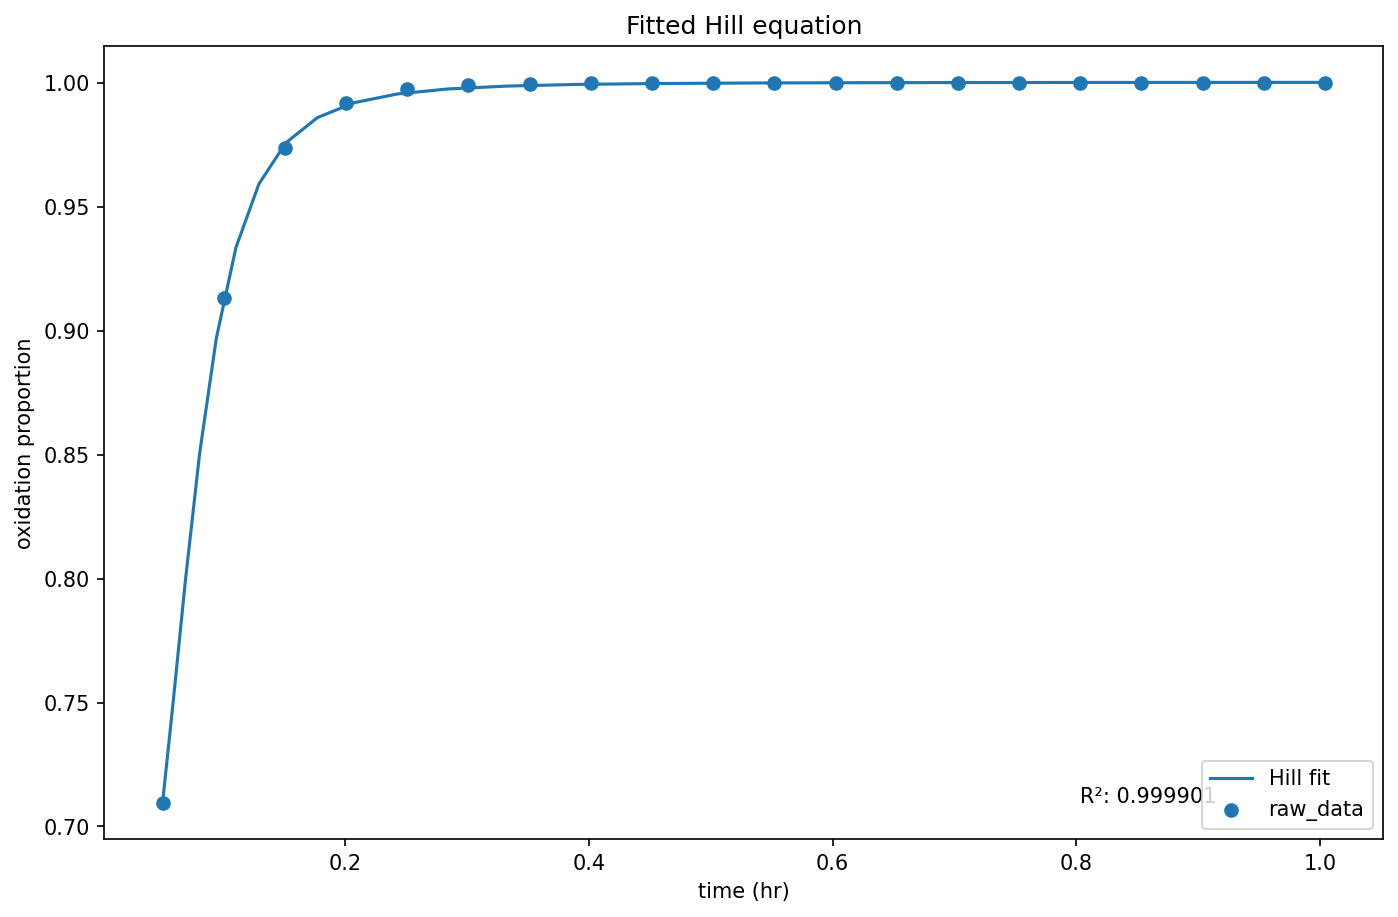

In [128]:
from scipy.constants import micro
from uncertainties import ufloat
from sigfig import round
from math import isclose
%run ../../pdipy/pdi.py
%matplotlib inline

# execute the simulation
target_reduction = 7.6
for photosensitizer_molar in [5*micro, 10*micro, 20*micro]:    
    # determine the experimental result
    if photosensitizer_molar == 20*micro:
        actual_value = 0.5          
    elif photosensitizer_molar == 5*micro:
        actual_value = 0.85
    elif photosensitizer_molar == 10*micro:
        actual_value = 0.85
        
    # execute the simulation
    pdi = PDI(verbose = True, jupyter = True)
    pdi.define_conditions(
        bacterial_specie = 'S_aureus', 
        bacterial_cfu_ml = 1E8,
        photosensitizer = '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide', 
        photosensitizer_characteristics = {
            'formula': {
                'value': 'C44_H38_N8_I4'   # mass with iodides included, sans iodides 678.84,
            },
            'dimensions':{
                'length (A)': total_length,
                'width (A)': total_length,
                'depth (A)': 1.5,
                'shape': 'disc',
            }
        },
        photosensitizer_molar = photosensitizer_molar,
        light_source = 'OSRAM 2\' 18W/840 lamps',
        light_characteristics = {
            "visible_proportion": {
              "value": (700-390)/(700-380),
            }
        }, 
        measurement = {
            'irradiance': 4
        }
    )
    pdi.simulate(
        export_name = f'Beirao_et_al, {int(photosensitizer_molar/micro)} uM solution',
        figure_title = f'{round(photosensitizer_molar, 3)} M of tetrakis-porphyrin',
        experimental_data = {
            'x': [actual_value],
            'y': [target_reduction]
        },
        display_fa_oxidation = True,
        export_contents = False
    )
    display(pdi.processed_data)

    # affirm the accuracy of the prediction
    value, unit = pdi.parse_data(target_reduction)    
    if value is not None:
        tolerance = actual_value/2
        acceptable_range_float = ufloat(actual_value, tolerance)
        if isclose(value, actual_value, abs_tol=tolerance):
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_value, 3)/actual_value*100}%-error')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_value, 3)/actual_value*100}%-error')
    else:
        print('--> ERROR: The value was never observed in the simulation predictions.')
    print('\n\n\n\n')

# Define and execute the biofilm simulation

The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 7.4E15 photosensitizers = (9.3E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 3.8E-6
photons per timestep:	2.632802071394705e-06
effective excitation watts:	4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*0.000821795989141709*0.6*ps - 666666666.666667*e_ps;
  _J1: e_ps + mo => so + ps; 0.8*10000000*e_ps*mo;
  _J2: ps + so => b_ps; 2.4*ps*so;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 702.49688*so*fa;
  _J5: so + eps => o_eps + mo; 37.75*so*eps;
  _J6:  => fa; 3.8441e-5*fa;

  // Species initializations:
  ps = 3.16198905019855e-07;
  e_ps = 4.67730208078544e-06;
  mo = 0.000281032883187507;
  so = 2.211650

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:83: DeprecationWarning:

invalid escape sequence \.

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89

,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.022220,0.936673,0.009759,1.198413
0.100418,0.043820,0.936669,0.019460,1.198382
0.150628,0.064822,0.936664,0.029106,1.198351
0.200837,0.085250,0.936660,0.038697,1.198319
0.251046,0.105123,0.936655,0.048237,1.198288
...,...,...,...,...
11.799163,0.990057,0.935483,2.002463,1.190327
11.849372,0.990264,0.935477,2.011630,1.190288
11.899582,0.990468,0.935472,2.020808,1.190250


,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,5.000000e-06,0.000000,0.000281,0.000000e+00,0.000000e+00,0.010976,0.000000,1130.004183,0.000000
180.753138,3.166089e-07,0.000005,0.000281,1.776530e-07,2.438963e-11,0.010807,0.000246,1128.635812,1.368371
361.506276,3.166073e-07,0.000005,0.000281,1.778072e-07,4.880032e-11,0.010639,0.000488,1127.267912,2.736270
542.259414,3.166058e-07,0.000005,0.000281,1.779617e-07,7.323209e-11,0.010474,0.000726,1125.900485,4.103698
723.012552,3.166043e-07,0.000005,0.000281,1.781164e-07,9.768497e-11,0.010311,0.000961,1124.533530,5.470653
...,...,...,...,...,...,...,...,...,...
42476.987448,3.162066e-07,0.000005,0.000281,2.203065e-07,6.377900e-09,0.000154,0.015323,822.971096,307.033086
42657.740586,3.162047e-07,0.000005,0.000281,2.205207e-07,6.408135e-09,0.000151,0.015327,821.734297,308.269886
42838.493724,3.162027e-07,0.000005,0.000281,2.207352e-07,6.438399e-09,0.000148,0.015331,820.498156,309.506026


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.022220,0.936673,0.009759,1.198413,0.022220,2.859770
0.100418,0.043820,0.936669,0.019460,1.198382,0.043820,2.869472
0.150628,0.064822,0.936664,0.029106,1.198351,0.064822,2.879117
0.200837,0.085250,0.936660,0.038697,1.198319,0.085250,2.888709
0.251046,0.105123,0.936655,0.048237,1.198288,0.105123,2.898248
...,...,...,...,...,...,...
11.799163,0.990057,0.935483,2.002463,1.190327,0.990057,4.852475
11.849372,0.990264,0.935477,2.011630,1.190288,0.990264,4.861642
11.899582,0.990468,0.935472,2.020808,1.190250,0.990468,4.870820


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy

3.6 time (hr)
0.050209     2.859770
0.100418     2.869472
0.150628     2.879117
0.200837     2.888709
0.251046     2.898248
               ...   
11.799163    4.852475
11.849372    4.861642
11.899582    4.870820
11.949791    4.880009
12.000000    4.889209
Name: log10-inactivation, Length: 239, dtype: float64
hours to target: 4.418410041841004
hours to target: 4.418410041841004
The prediction of 4.418410041841004 is within the 4.5+/-2.2 tolerance of the actual value.
A -1.8133333333333335%-error





The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 1.5E16 photosensitizers = (1.9E-11 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 7.6E-6
photons per timestep:	2.632802071394705e-06
effective excitation watts:	4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation

,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.043939,0.936669,0.019515,1.198382
0.100418,0.085747,0.936660,0.038934,1.198319
0.150628,0.125547,0.936650,0.058264,1.198257
0.200837,0.163455,0.936641,0.077511,1.198194
0.251046,0.199577,0.936632,0.096680,1.198131
...,...,...,...,...
11.799163,0.999993,0.933987,5.136251,1.180369
11.849372,0.999993,0.933972,5.164066,1.180275
11.899582,0.999994,0.933958,5.191947,1.180180


,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,1.000000e-05,0.000000,0.000281,0.000000e+00,0.000000e+00,1.097643e-02,0.000000,1130.004183,0.000000
180.753138,6.332147e-07,0.000009,0.000281,3.553896e-07,9.753901e-11,1.056567e-02,0.000486,1127.269638,2.734545
361.506276,6.332085e-07,0.000009,0.000281,3.560070e-07,1.952464e-10,1.016950e-02,0.000954,1124.536980,5.467203
542.259414,6.332023e-07,0.000009,0.000281,3.566260e-07,2.931227e-10,9.787412e-03,0.001405,1121.806214,8.197968
723.012552,6.331961e-07,0.000009,0.000281,3.572467e-07,3.911683e-10,9.418939e-03,0.001840,1119.077347,10.926836
...,...,...,...,...,...,...,...,...,...
42476.987448,6.314016e-07,0.000009,0.000281,5.586349e-07,2.873069e-08,9.411042e-08,0.012879,552.957312,577.046871
42657.740586,6.313919e-07,0.000009,0.000281,5.598092e-07,2.888387e-08,8.827189e-08,0.012879,550.851352,579.152831
42838.493724,6.313822e-07,0.000009,0.000281,5.609864e-07,2.903736e-08,8.278300e-08,0.012879,548.749010,581.255173


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.043939,0.936669,0.019515,1.198382,0.043939,2.869526
0.100418,0.085747,0.936660,0.038934,1.198319,0.085747,2.888945
0.150628,0.125547,0.936650,0.058264,1.198257,0.125547,2.908275
0.200837,0.163455,0.936641,0.077511,1.198194,0.163455,2.927522
0.251046,0.199577,0.936632,0.096680,1.198131,0.199577,2.946692
...,...,...,...,...,...,...
11.799163,0.999993,0.933987,5.136251,1.180369,0.999993,7.986262
11.849372,0.999993,0.933972,5.164066,1.180275,0.999993,8.014078
11.899582,0.999994,0.933958,5.191947,1.180180,0.999994,8.041959


C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:84: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\light.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:85: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy\\pdipy\\parameters\\photosensitizers.json' mode='r' encoding='utf-8'>

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy\pdi.py:89: ResourceWarning:

unclosed file <_io.TextIOWrapper name='C:\\Users\\Andrew Freiburger\\Dropbox\\My PC (DESKTOP-M302P50)\\Documents\\UVic Civil Engineering\\PDIpy\\PDIpy

5 time (hr)
0.050209     2.869526
0.100418     2.888945
0.150628     2.908275
0.200837     2.927522
0.251046     2.946692
               ...   
11.799163    7.986262
11.849372    8.014078
11.899582    8.041959
11.949791    8.069904
12.000000    8.097914
Name: log10-inactivation, Length: 239, dtype: float64
hours to target: 5.623430962343096
hours to target: 5.623430962343096
The prediction of 5.623430962343096 is within the 4.5+/-2.2 tolerance of the actual value.
A 24.88888888888889%-error





The photosensitizer dimensions as a disc = 3.28e-09 m x 3.28e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-27 m³
The volume proportion of 2.9E16 photosensitizers = (3.7E-11 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 1.5E-5
photons per timestep:	2.632802071394705e-06
effective excitation watts:	4.3E-3
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, mo, so, b_ps, fa, o_fa, eps, o_eps;

  // Assignment Rules:
  oxidation := 

,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.085919,0.936660,0.039015,1.198320
0.100418,0.164241,0.936641,0.077919,1.198194
0.150628,0.235695,0.936623,0.116733,1.198068
0.200837,0.300930,0.936604,0.155479,1.197941
0.251046,0.360523,0.936586,0.194175,1.197815
...,...,...,...,...
8.937238,1.000000,0.932025,9.785938,1.167652
8.987448,1.000000,0.931988,9.992183,1.167417
9.037657,1.000000,0.931951,10.257872,1.167180


,[ps],[e_ps],[mo],[so],[b_ps],[fa],[ofa],[eps],[oeps]
Time (s),,,,,,,,,
0.000000,0.000020,0.000000,0.000281,0.000000e+00,0.000000e+00,1.097643e-02,0.000000,1130.004183,0.000000
180.753138,0.000001,0.000019,0.000281,7.111108e-07,3.899992e-10,1.010024e-02,0.000949,1124.543875,5.460308
361.506276,0.000001,0.000019,0.000281,7.135808e-07,7.813442e-10,9.291085e-03,0.001826,1119.091140,10.913043
542.259414,0.000001,0.000019,0.000281,7.160640e-07,1.174042e-09,8.544063e-03,0.002635,1113.646025,16.358157
723.012552,0.000001,0.000019,0.000281,7.185606e-07,1.568100e-09,7.854618e-03,0.003381,1108.208577,21.795606
...,...,...,...,...,...,...,...,...,...
42476.987448,0.000001,0.000019,0.000279,1.784144e-06,1.494292e-07,-1.398567e-14,0.011856,175.405426,954.598756
42657.740586,0.000001,0.000019,0.000279,1.790181e-06,1.504037e-07,1.531701e-14,0.011856,173.279417,956.724766
42838.493724,0.000001,0.000019,0.000279,1.796204e-06,1.513814e-07,3.296450e-14,0.011856,171.172125,958.832058


,oxidation,excitation,log10-oxidation,log10-excitation,inactivation,log10-inactivation
time (hr),,,,,,
0.050209,0.085919,0.936660,0.039015,1.198320,0.085919,2.889027
0.100418,0.164241,0.936641,0.077919,1.198194,0.164241,2.927930
0.150628,0.235695,0.936623,0.116733,1.198068,0.235695,2.966745
0.200837,0.300930,0.936604,0.155479,1.197941,0.300930,3.005491
0.251046,0.360523,0.936586,0.194175,1.197815,0.360523,3.044186
...,...,...,...,...,...,...
8.937238,1.000000,0.932025,9.785938,1.167652,1.000000,12.635950
8.987448,1.000000,0.931988,9.992183,1.167417,1.000000,12.842195
9.037657,1.000000,0.931951,10.257872,1.167180,1.000000,13.107883


6.3 time (hr)
0.050209     2.889027
0.100418     2.927930
0.150628     2.966745
0.200837     3.005491
0.251046     3.044186
              ...    
8.937238    12.635950
8.987448    12.842195
9.037657    13.107883
9.087866    13.456187
9.138075    14.036637
Name: log10-inactivation, Length: 182, dtype: float64
hours to target: 4.066945606694561
hours to target: 4.066945606694561
The prediction of 4.066945606694561 is within the 4.5+/-2.2 tolerance of the actual value.
A -9.622222222222222%-error







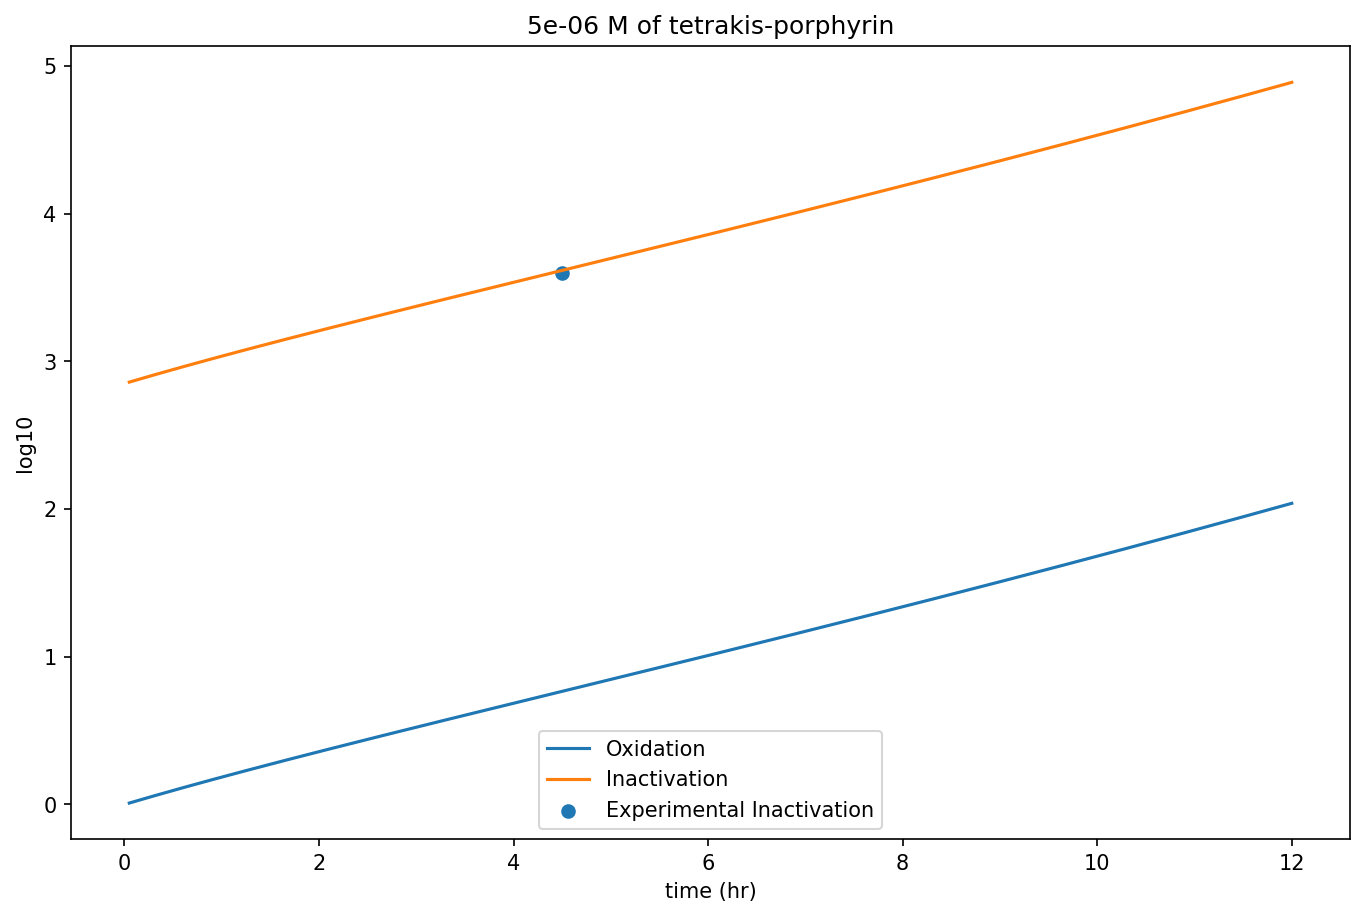

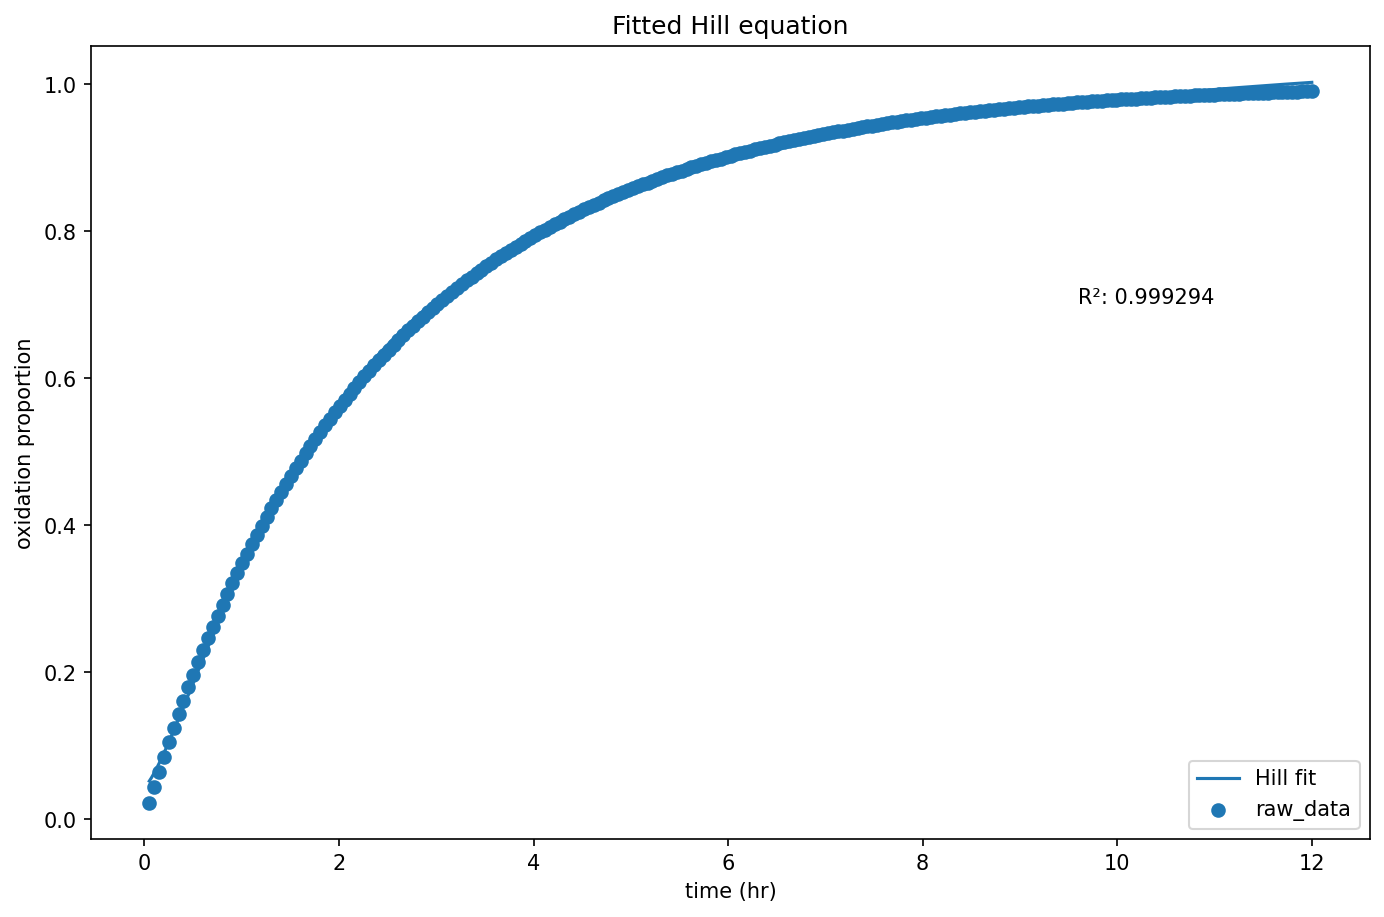

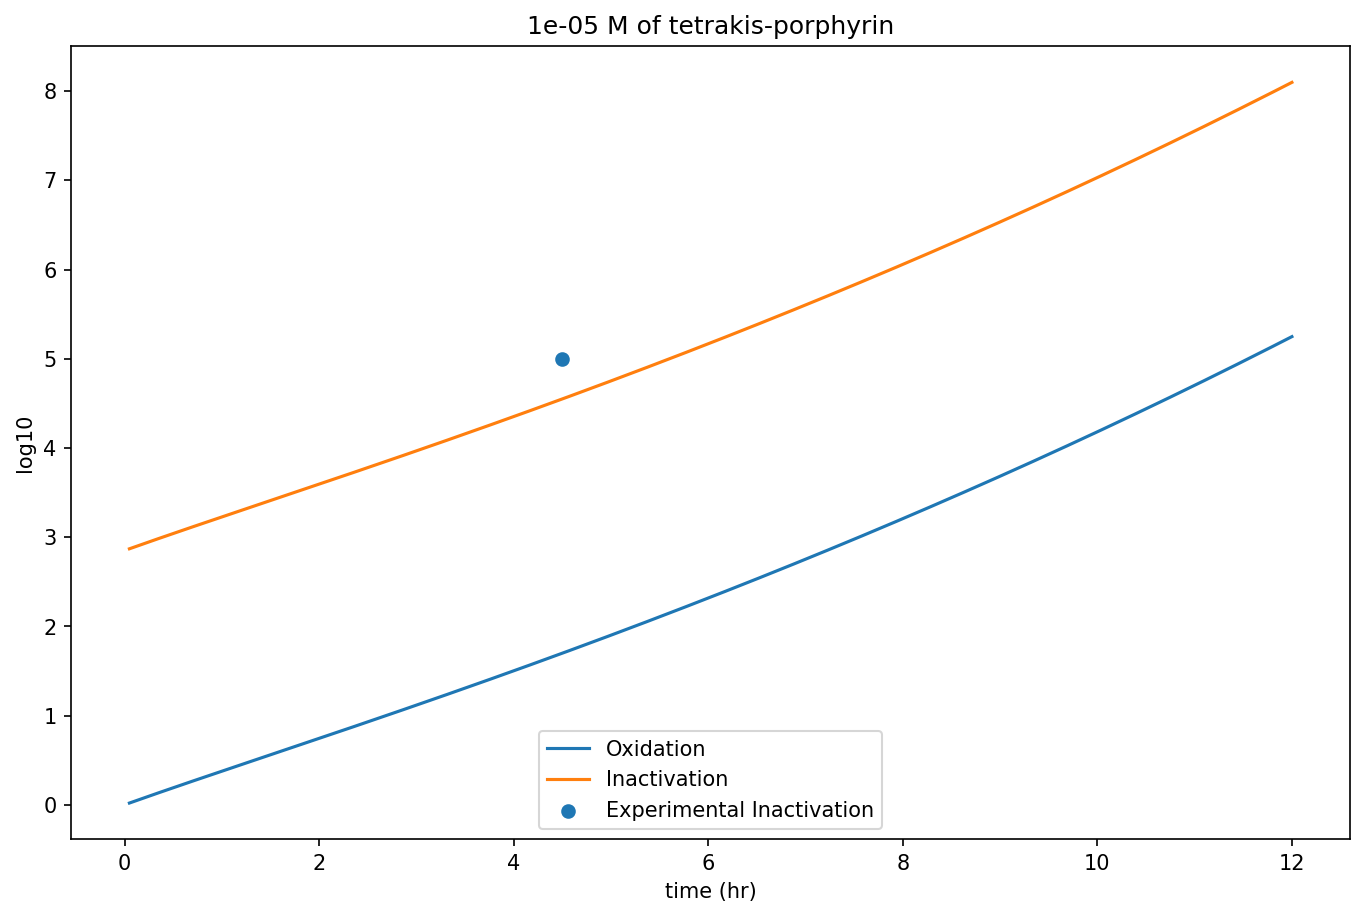

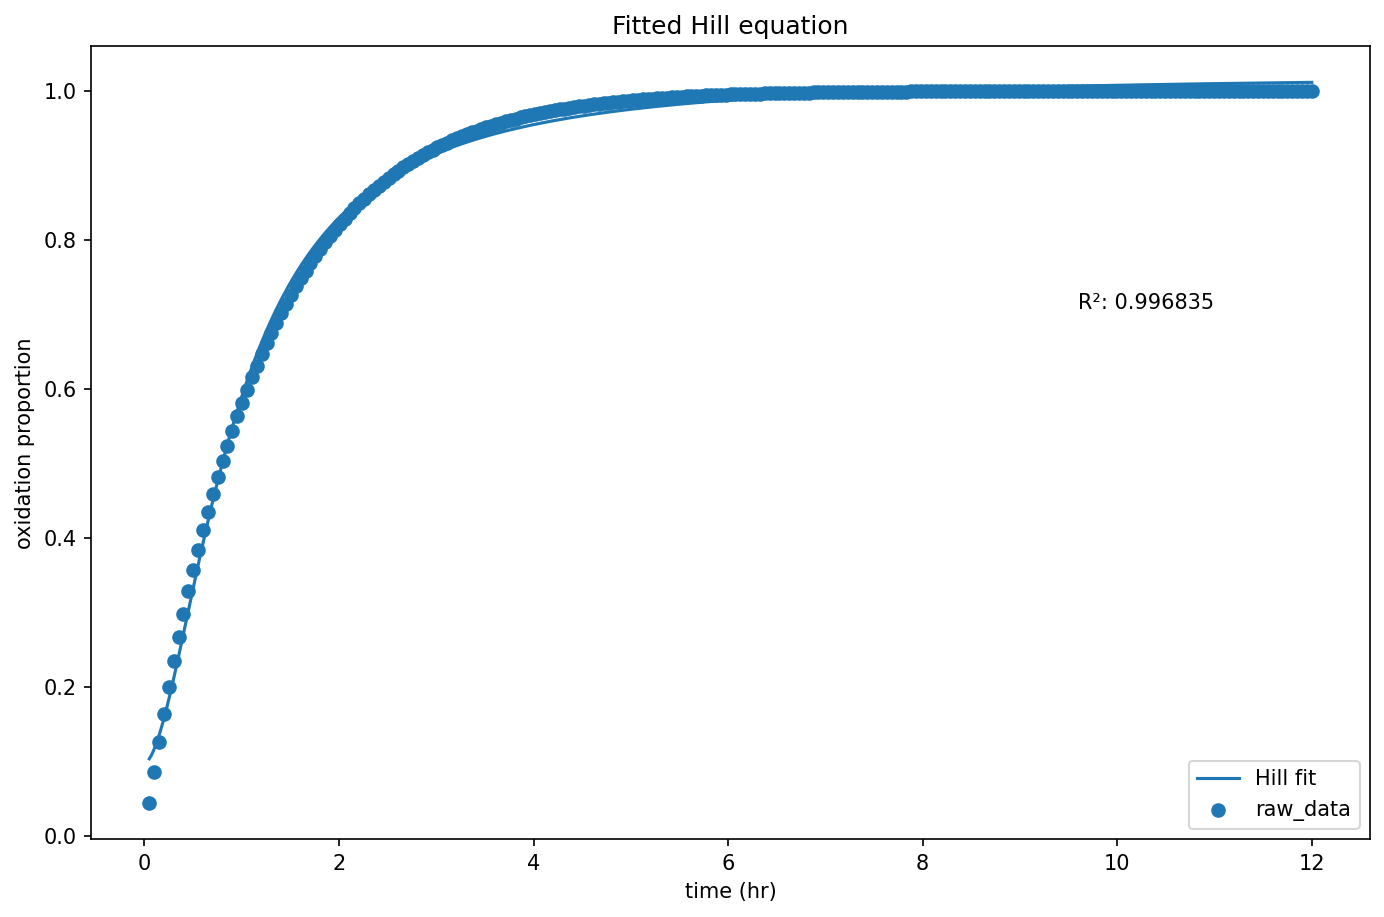

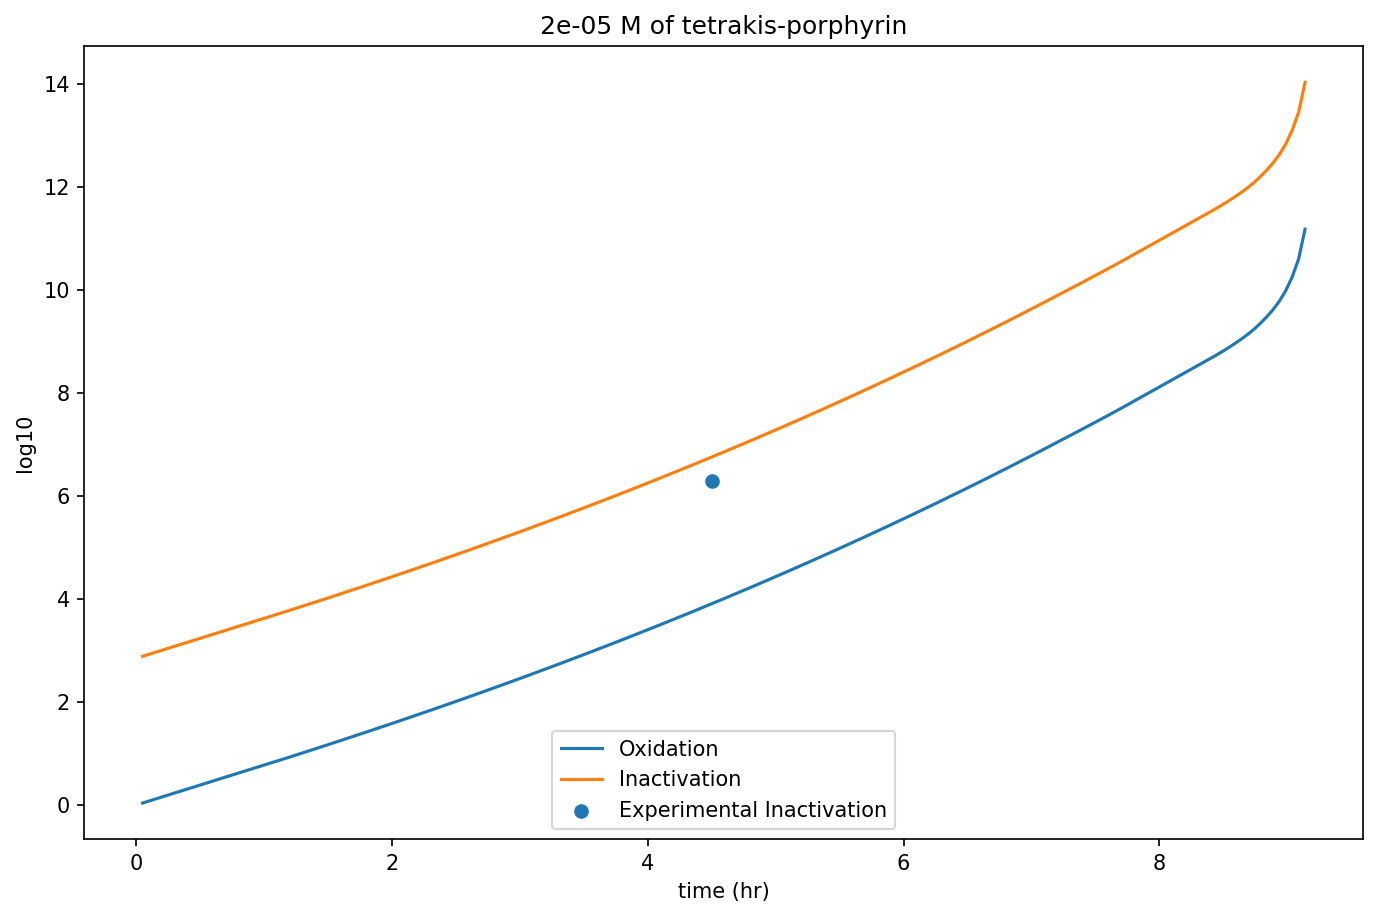

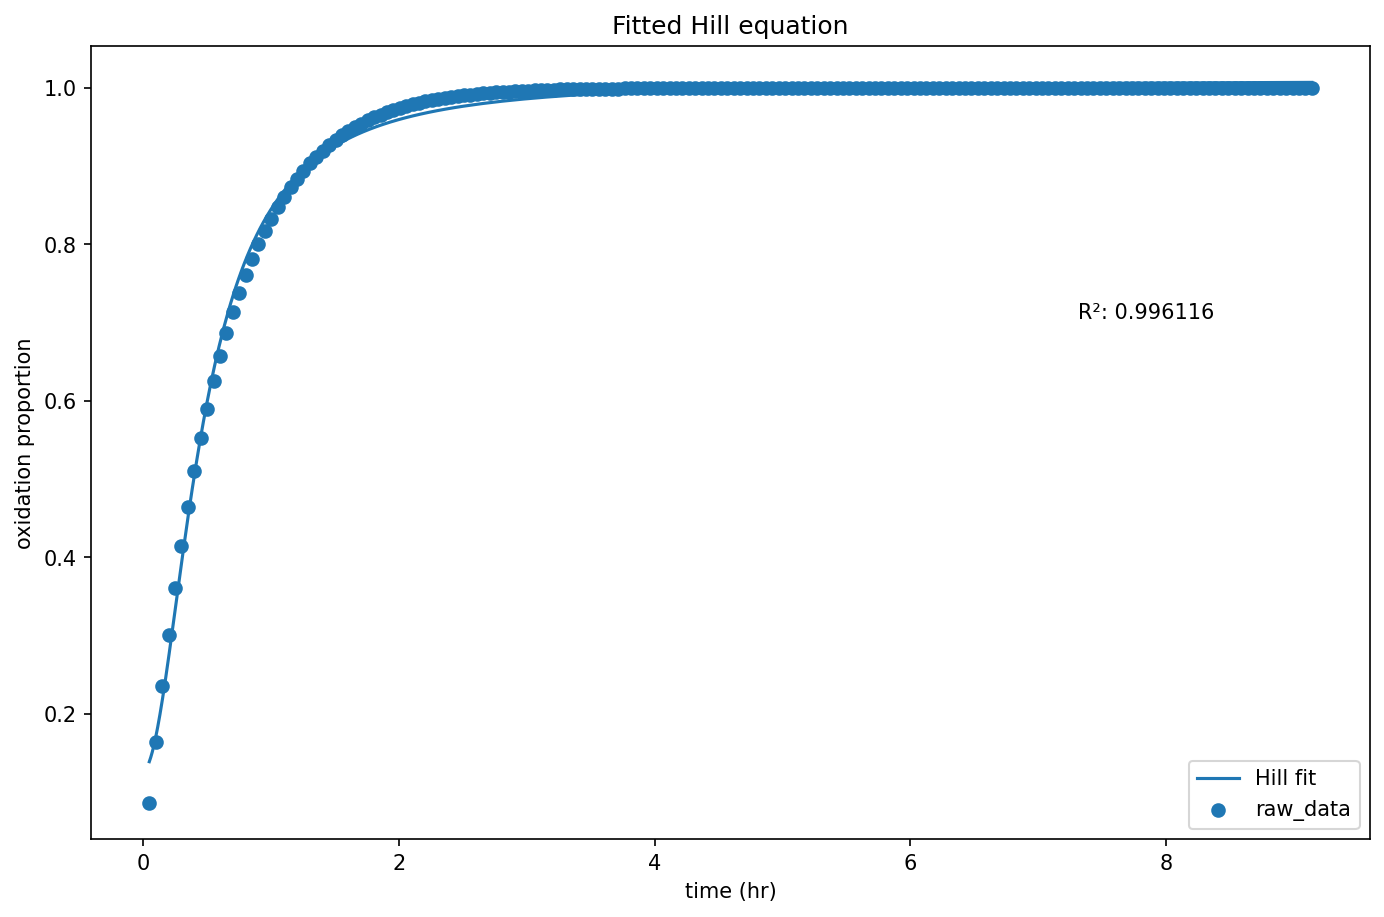

In [129]:
from scipy.constants import micro
from uncertainties import ufloat
from math import isclose
%run ../../pdipy/pdi.py
%matplotlib inline

# execute the simulation
for photosensitizer_molar in [5*micro, 10*micro, 20*micro]:
    # determine the experimental result
    actual_value = 4.5
    if photosensitizer_molar == 20*micro:
        log_reduction = 6.3          
    elif photosensitizer_molar == 5*micro:
        log_reduction = 3.6
    elif photosensitizer_molar == 10*micro:
        log_reduction = 5
        
    # execute the simulation
    pdi = PDI(verbose = True, jupyter = True)
    pdi.define_conditions(
        bacterial_specie = 'S_aureus', 
        bacterial_cfu_ml = 1E8,
        biofilm = True,
        photosensitizer = '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide', 
        photosensitizer_characteristics = {
            'formula': {
                'value': 'C44_H38_N8_I4'   # mass with iodides included, sans iodides 678.84,
            },
            'dimensions':{
                'length (A)': total_length,
                'width (A)': total_length,
                'depth (A)': 1.5,
                'shape': 'disc',
            }
        },
        photosensitizer_molar = photosensitizer_molar,
        light_source = 'OSRAM 2\' 18W/840 lamps',
        light_characteristics = {
            "visible_proportion": {
              "value": (700-390)/(700-380),
            }
        }, 
        measurement = {
            'irradiance': 4
        }
    )
    pdi.simulate(
        export_name = f'Beirao_et_al, biofilm, {int(photosensitizer_molar/micro)} uM solution',
        figure_title = f'{round(photosensitizer_molar, 3)} M of tetrakis-porphyrin',
        experimental_data = {
            'x': [actual_value],
            'y': [log_reduction]
        },
        display_fa_oxidation = True,
        export_contents = False
    )
    display(pdi.processed_data)

    value, unit = pdi.parse_data(
        log_reduction = log_reduction
    )            
    if value is not None:
        tolerance = actual_value/2
        acceptable_range_float = ufloat(actual_value, tolerance)
        if isclose(value, actual_value, abs_tol=tolerance):
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_value, 3)/actual_value*100}%-error')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_value, 3)/actual_value*100}%-error')
    
    print('\n\n\n\n')